# Function Fitting

### load data & set functions

In [1]:
from six.moves import cPickle as pickle
import numpy as np
import pandas as pd
import math
import numpy as np
from scipy.optimize import curve_fit
import DC_Pickle as dcp
import Curve_Functions as cv
import matplotlib.pyplot as plt
%matplotlib inline
    
def disp_Data(x_axis, y_axis, colour_shape='b.', rows=1, columns=1, size=(5, 5)):
    fig, axes = plt.subplots(rows, columns, figsize=size)
    axes.plot(x_axis, y_axis, colour_shape)
    plt.show()

(15,)
(2, 15)
[ 0.06949649  0.11833792  0.12415684  0.21923799  0.21402511  0.2695956
  0.38354837  0.1381195   0.2282138   0.21838991  0.20394061  0.29085711
  0.15276998  0.26760545  0.32473221]


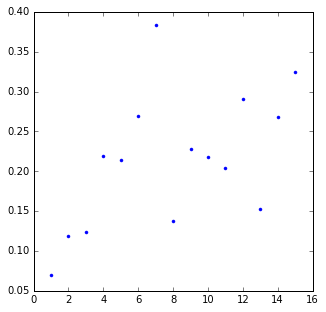

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [2]:
data_path = "../../data/pickles/clusters/centroid2.pickle"
train_data = dcp.open_Pickle(data_path)
print(np.shape(train_data[0, :, 0]))
train_data = train_data[:, :, 0]

print(np.shape(train_data)) # centroid of cluster 1
print(train_data[0,:])
attempts = np.arange(15)+1 # attempts
scores = train_data[0,:] # centroid of cluster 1

disp_Data(attempts, scores)

print(attempts)

### exponential fit

#### Two parameters

In [14]:
popt, pcov = curve_fit(cv.exponential_curve2, attempts, scores)

(0, 0.43354836943552055)

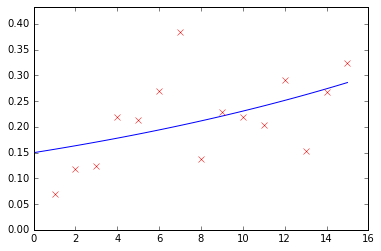

In [15]:
x_fit = np.linspace(0, 15, 100)
plt.plot(x_fit, cv.exponential_curve2(x_fit, popt[0], popt[1]), 'b-')
plt.plot(attempts, scores, 'rx')
plt.ylim([0, max(scores)+0.05])

#### Three parameters

In [16]:
popt, pcov = curve_fit(cv.exponential_curve3, attempts, scores)

(0, 0.43354836943552055)

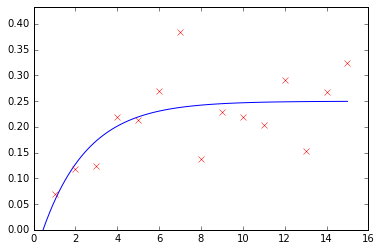

In [17]:
x_fit = np.linspace(0, 15, 100)
plt.plot(x_fit, cv.exponential_curve3(x_fit, popt[0], popt[1], popt[2]), 'b-')
plt.plot(attempts, scores, 'rx')
plt.ylim([0, max(scores)+0.05])

### polynoimial fit

In [18]:
popt, pcov = curve_fit(cv.polynomial_curve, attempts, scores)

(0, 0.43354836943552055)

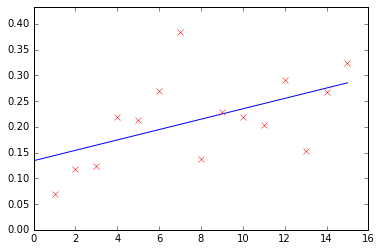

In [19]:
x_fit = np.linspace(0, 15, 100)
plt.plot(x_fit, cv.polynomial_curve(x_fit, popt[0], popt[1]), 'b-')
plt.plot(attempts, scores, 'rx')
plt.ylim([0, max(scores)+0.05])

### power law fit

#### Two parameters

In [20]:
popt, pcov = curve_fit(cv.powerlaw_curve2, attempts, scores)

(0, 0.43354836943552055)

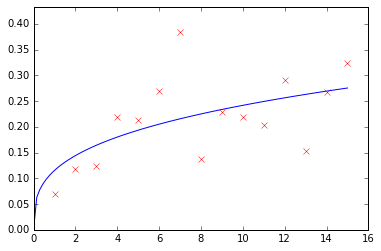

In [21]:
x_fit = np.linspace(0, 15, 100)
plt.plot(x_fit, cv.powerlaw_curve2(x_fit, popt[0], popt[1]), 'b-')
plt.plot(attempts, scores, 'rx')
plt.ylim([0, max(scores)+0.05])

#### Thress parameters

In [22]:
popt, pcov = curve_fit(cv.powerlaw_curve3, attempts, scores)

(0, 0.43354836943552055)

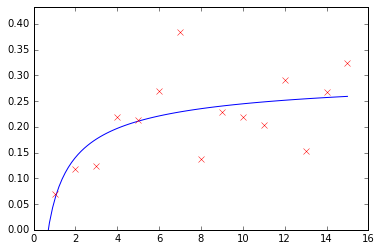

In [23]:
x_fit = np.linspace(0, 15, 100)
plt.plot(x_fit, cv.powerlaw_curve3(x_fit, popt[0], popt[1], popt[2]), 'b-')
plt.plot(attempts, scores, 'rx')
plt.ylim([0, max(scores)+0.05])

#### Four parameters

In [24]:
popt, pcov = curve_fit(cv.powerlaw_curve4, attempts, scores, maxfev = 1000000)

[  2.29654358e+158   7.25125495e+001   2.50095879e-001   1.55215601e+002]


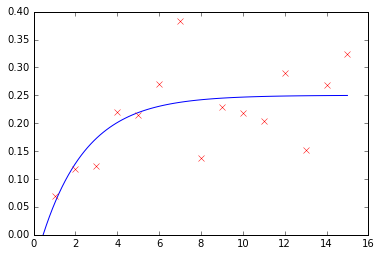

In [25]:
popt, pcov = curve_fit(cv.powerlaw_curve4, attempts, scores, maxfev = 1000000)

x_fit = np.linspace(0, 15, 100)
plt.plot(x_fit, cv.powerlaw_curve4(x_fit, popt[0], popt[1], popt[2], popt[3]), 'b-')
plt.plot(attempts, scores, 'rx')
plt.ylim([0, 0.4])
print(popt)